In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import bread.data, bread.vis
from bread.data import Segmentation, Features, Lineage, Contour, Ellipse

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
SCALE_LENGTH = 1/9.2308  # microns per pixel
SCALE_TIME = 5  # minutes per frame

# Bud growth

Eccentricity and size

In [5]:
colony_ids = [1,2,3,4,5]
all = []

for colony_id in colony_ids:
	seg = Segmentation.from_h5(f'../../data/raw/colony{colony_id:03d}_segmentation.h5')
	lin_truth = Lineage.from_csv(f'../../data/raw/colony{colony_id:03d}_lineage.csv')
	feat = Features(
		seg,
		scale_length=SCALE_LENGTH,  # microns per pixel
		scale_time=SCALE_TIME,  # minutes per frame
	)

	for _, bud_id, time_id in lin_truth.only_budding_events():
		els, ok_time_ids = feat._fn_times(
			lambda t: feat._ellipse(bud_id, t),
			time_id, 20
		)
		all.append((els, ok_time_ids))

/run/media/nicole/nicole_data/Documents/2018 EPFL/PH MA 2/TP4/bread-git/bread/src/bread/data/_features.py:295: FnTimesWarning: Could not determine call to <function <lambda> at 0x7f0da3388b90> at time_id=123, got exception Unable to find cell_id=40 at time_id=124 in the segmentation.
  warnings.warn(Features.FnTimesWarning(fn, time_id, e))
/run/media/nicole/nicole_data/Documents/2018 EPFL/PH MA 2/TP4/bread-git/bread/src/bread/data/_features.py:295: FnTimesWarning: Could not determine call to <function <lambda> at 0x7f0da3388b90> at time_id=123, got exception Unable to find cell_id=40 at time_id=125 in the segmentation.
  warnings.warn(Features.FnTimesWarning(fn, time_id, e))
/run/media/nicole/nicole_data/Documents/2018 EPFL/PH MA 2/TP4/bread-git/bread/src/bread/data/_features.py:295: FnTimesWarning: Could not determine call to <function <lambda> at 0x7f0da3388b90> at time_id=123, got exception Unable to find cell_id=40 at time_id=126 in the segmentation.
  warnings.warn(Features.FnTime

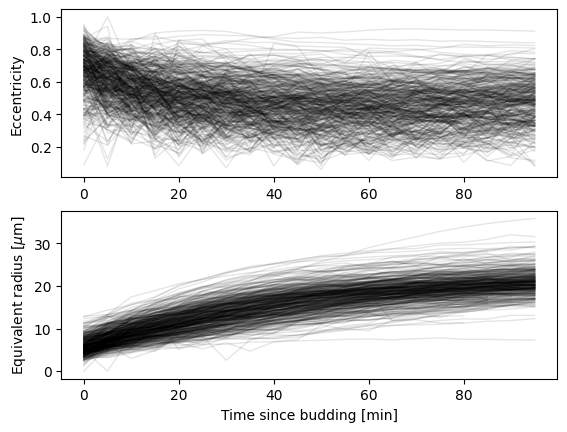

In [6]:
fig, ax = plt.subplots(nrows=2)

for els, ok_time_ids in all:
	rel_time = np.array(ok_time_ids)
	rel_time -= rel_time.min()
	rel_time *= SCALE_TIME  # convert to minutes
	eccs = np.array([ el.ecc for el in els ])
	rs = np.array([ np.sqrt(el.r_maj*el.r_min) for el in els ])
	ax[0].plot(rel_time, eccs, color='k', linewidth=1, alpha=0.1)
	ax[1].plot(rel_time, rs, color='k', linewidth=1, alpha=0.1)

ax[1].set_xlabel('Time since budding [min]')
ax[0].set_ylabel('Eccentricity')
ax[1].set_ylabel('Equivalent radius [$\\mu$m]')
plt.show()

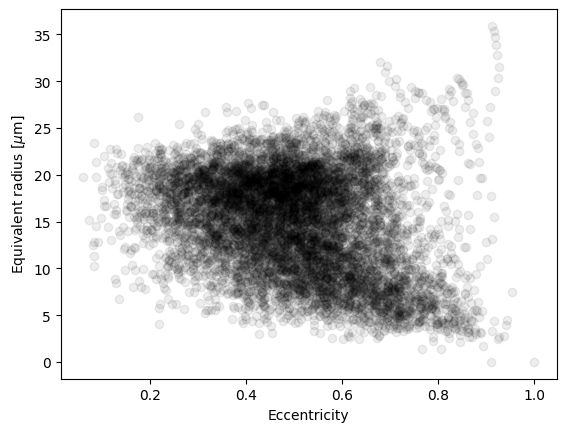

In [26]:
eccs = [ el.ecc for els, _ in all for el in els ]
requivs = [ el.r_equiv for els, _ in all for el in els ]

fig, ax = plt.subplots()

ax.plot(eccs, requivs, 'ok', alpha=0.07)
ax.set_xlabel('Eccentricity')
ax.set_ylabel('Equivalent radius [$\\mu$m]')

plt.show()